# Time Series data generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Equation of a wave: y(x,t) = a * sin (ω*t + φ) 

a = amplitude of the wave

ω = angular frequency (how many cycles occur in a second)

t = time

φ = phase of the signal

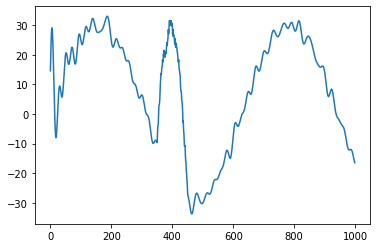

In [ ]:
randcomp = 200
w_rand_ampl=0.2
w_rand_offs=0.1

w = np.random.rand(200)*0.2+0.1
p = np.random.rand(200)
a = np.random.rand(200)*0.1+0.1

x = np.arange(start=0, stop=1000)

y = np.zeros(1000)
for i in range(200):
  y += np.sin(w[i]*x+p[i])*a[i]

peak = -0.02*(x-400)**2+50
peak += np.random.rand(1000)*3
peak[x<350]=0
peak[x>450]=0
#plt.plot(x,peak)
plt.plot(x,y+peak+np.sin(0.01*x)*30)

